In [1]:
import torch
import torch.nn as nn

import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time
import os
import copy
from PIL import Image
from models import UNet16
from clustering import get_instance_masks

import torchvision.transforms.functional as TF

os.environ["CUDA_VISIBLE_DEVICES"] = "1"


In [2]:
model = UNet16(16, pretrained=True)

model.load_state_dict(torch.load('./marchantia_results/insseg/16fdim_1000_session2/model_1000epochs_16fdim_unet16.pt'))
# model.load_state_dict(torch.load('./marchantia_results/insseg/frozen_encoder/model_1000epochs_16fdim_unet16_freezeenc.pt'))
model.eval()

device = torch.device("cuda:0")

model = model.to(device)

In [3]:
transform = transforms.Compose([
    transforms.ToTensor()
])

with torch.no_grad():
#     image = Image.open('./CVPPP2017_LSC_training/testing/A1/plant141_rgb.png')
#     mask = Image.open('./CVPPP2017_LSC_training/testing/A1/plant141_fg.png')
    
#     image = Image.open('../marchantia_images/g1_t036_c001.png')
#     image = Image.open('../marchantia_images/g6_t037_c001.png')
    image = Image.open('../marchantia_images/g6_t037_c001_downscale512.png')
#     image = Image.open('./g1_t036_c001.png')
#     image = Image.open('./marchantia_data/cropped_imgs/17_19_cropped.png')
#     image = Image.open('./marchantia_data/cropped_imgs/700_synth.png')

    
#     image = TF.resize(image, (512,512))
#     mask = TF.resize(mask, (512,512))
    
#     mask = mask.convert("RGB")
#     mask2 = np.asarray(mask, dtype=np.float32) / 255
    
    image = image.convert("RGB")
    image = np.asarray(image, dtype=np.float32) / 255
    image = image[:, :, :3]
#     instance_input = np.where(mask2 == 0, np.array([0,0,0], dtype = np.float32), image)
    
#     mask = TF.to_grayscale(mask, num_output_channels=1)
#     mask = transform(mask)
#     mask = mask.to(device)
    
    image = transform(image)
    image = image.unsqueeze(0)
    
#     instance_input = transform(instance_input)
#     instance_input = instance_input.unsqueeze(0)

    image = image.to(device)
    output = model(image)
    
    instance_output = output[1]
    
    instance_masks = get_instance_masks(instance_output)
    
#     torchvision.utils.save_image(image, './marchantia_results/insseg/input2_017.png')    
#     torchvision.utils.save_image(instance_input, './results/insseg/insinput141.png')

prediction shape: torch.Size([1, 16, 512, 512])
feature_dim: 16
Mean shift clustering, might take some time ...
time for clustering 211.4696671962738
Number of predicted clusters:  264
labels: (512, 512)
unique labels:  264
mask: (512, 512, 3)


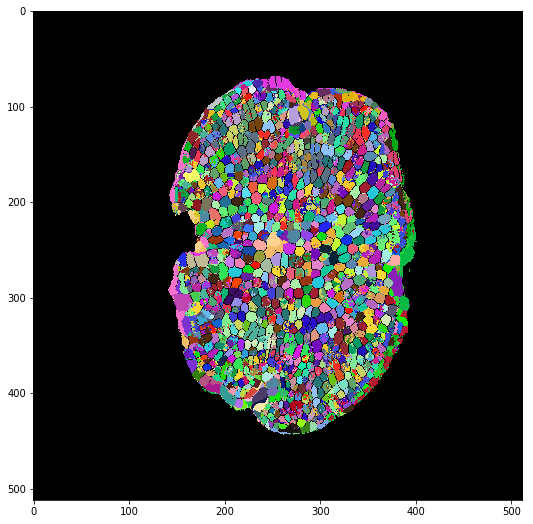

In [4]:
plt.figure(figsize=(9,9))
plt.imshow(instance_masks[0][0], interpolation='nearest')
plt.show()

In [5]:
norm = plt.Normalize(vmin=instance_masks[0][0].min(), vmax=instance_masks[0][0].max())

saveimage = norm(instance_masks[0][0])

# save the image
plt.imsave('marchantia_results/insseg/16fdim_1000_session2/result6_37_1000epochs_16fdim_unet16_2.png', saveimage)

In [14]:
saveimage.shape

(512, 512, 3)

18


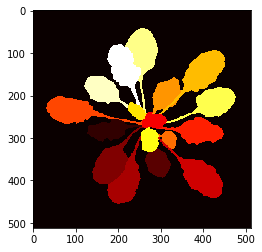

In [5]:
instance_mask = Image.open('./CVPPP2017_LSC_training/testing/A1/plant141_label.png')
instance_mask = TF.resize(instance_mask, (512, 512))
instance_mask = np.array(instance_mask)

print(len(np.unique(instance_mask)))

plt.imshow(instance_mask, cmap='hot', interpolation='nearest')
plt.show()